Root at lambda = 1: -1.618033988749895


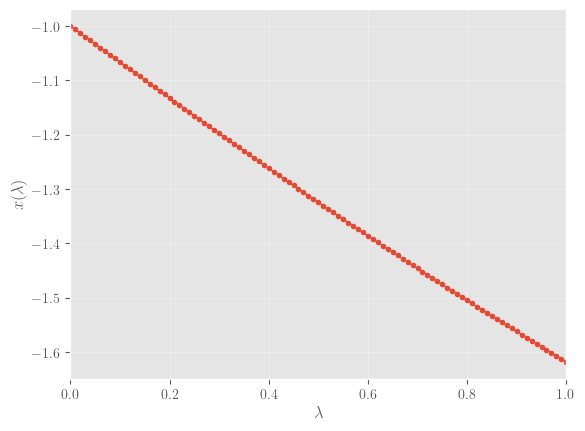

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

def secant(g, x0, x1, tol=1e-12, max_iter=50):
    """Return a root of g using the secant method starting from x0, x1."""
    f0 = g(x0)
    f1 = g(x1)
    for _ in range(max_iter):
        denom = (f1 - f0)
        if abs(denom) < 1e-16:
            # fall back to a tiny step to avoid division by ~0
            x2 = x1 + 1e-6 if x1 == x0 else x1 + (x1 - x0) * 1e-3
        else:
            x2 = x1 - f1 * (x1 - x0) / denom
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
        f0, f1 = f1, g(x1)
    return x1  # return best iterate if not converged

# --- define the parameterized family f_lambda(x) ----------------------------
def f_lambda(x, lam):
    return x**3 - 2.0*lam*x + 1.0

# --- continuation sweep -----------------------------------------------------
lams = np.linspace(0.0, 1.0, 101)   # lambda = 0, 0.01, ..., 1
x_path = []

x_guess = -1.0                      # exact root at lambda=0
for lam in lams:
    g = lambda x: f_lambda(x, lam)
    # use previous root and a small perturbation as the two secant seeds
    x_guess = secant(g, x_guess, x_guess - 0.1, tol=1e-12, max_iter=50)
    x_path.append(x_guess)

root_at_1 = x_path[-1]
print("Root at lambda = 1:", root_at_1)

# --- (optional) visualize the solution path x(lambda) -----------------------
plt.figure()
plt.plot(lams, x_path, marker=".", linewidth=1)
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$x(\lambda)$")
# plt.title("Continuation path for f_lambda(x) = x^3 - 2*lambda*x + 1")
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.savefig("../../../figs/nle/simple_continuation.pdf", transparent=True)
plt.show()